1) Criar um identificador de transações fraudulentas utilizando os seguintes algoritmos de classificação **sem alterar hyperparametros**:



- "Nearest Neighbors" 
- "Linear SVM"
- "Decision Tree"
- "Random Forest"
- "Naive Bayes"
- "Neural Net"


(http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


2) Criar uma tabela com as métricas dos algoritmos (precisao, recall, acurácia e F1).


3) Criar um "modelo" que é a média das probabilidades dos 6 modelos anteriores e gerar as 4 métricas.


**Bonus**

4) Analisar a Curva ROC dos modelos. Porque não podemos analisar a AUC nesse caso? Qual a "exigência" dessa métrica?


**Dados**:
creditcard.csv.zip

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import seaborn as sns

In [6]:
sns.jointplot

<function seaborn.axisgrid.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x00000146F683D840>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)>

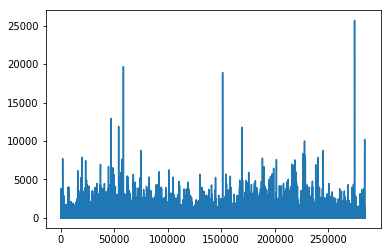

In [7]:
df['Amount'].plot()

# Transações e Fraudes por segundo

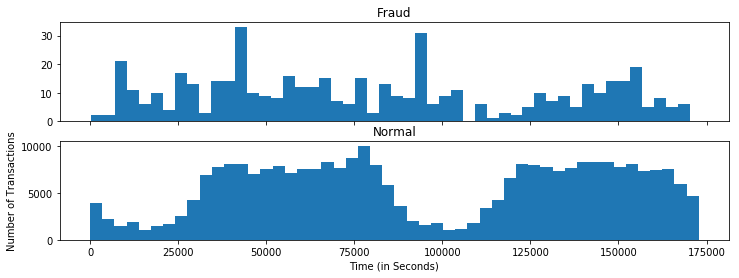

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

# Vamos reduzir as dimensões para apenas 2 e ver se nosso target (fraude) é separavel com um algoritmo não linear

assim como fizemos na aula passada com os digitos

(demora para rodar ...)

C:\Users\sn3fru\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


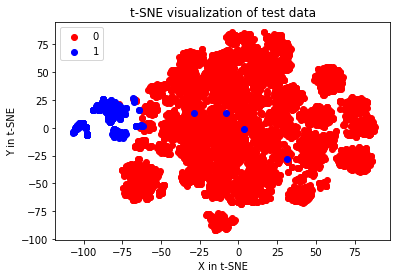

In [9]:
from sklearn.manifold import TSNE

df2 = df[df.Class == 1]
df2 = pd.concat([df2, df[df.Class == 0].sample(n = 10000)], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.ix[:,-1].values

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [10]:
def generate_XY_train_test(data, test_size, target_column, mult):
    data=data.reset_index(drop=True)
    data_target = data[data[target_column] == 1]
    data_non_target = data[data[target_column] == 0]
    non_target_index = data_non_target.index
    np.random.seed(27)
    random_indices = np.random.choice(non_target_index, len(data_target)*mult, replace=False)
    data_non_target_sample = data.loc[random_indices]
    final_df = pd.concat([data_target, data_non_target_sample])
    Y=final_df[target_column]
    X=pd.get_dummies(final_df)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=12345, stratify=Y)
    return X_train, X_test, Y_train, Y_test

In [191]:
X_train, X_test, Y_train, Y_test = generate_XY_train_test(df, 0.33, 'Class', 1)

print(len(X_train))
print(len(X_test))

659
325


In [192]:
Y_test.sum()

162

# Rodando os modelos

Passo 1) Instancias os modelos.

In [193]:
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
nn = MLPClassifier(hidden_layer_sizes=(100,100,50))

Passo 2) Treinar todos os modelos

In [194]:
%time knn.fit(X_train, Y_train)
%time svc.fit(X_train, Y_train)
%time dtc.fit(X_train, Y_train)
%time rfc.fit(X_train, Y_train)
%time gnb.fit(X_train, Y_train)
%time nn.fit(X_train, Y_train)

Wall time: 2 ms
Wall time: 194 ms
Wall time: 18.3 ms
Wall time: 15 ms
Wall time: 1.01 ms
Wall time: 48.8 ms


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Passo 3) Realizar as predições

In [195]:
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)
yhat_dtc = dtc.predict(X_test)
yhat_rfc = rfc.predict(X_test)
yhat_gnb = gnb.predict(X_test)
yhat_nn = nn.predict(X_test)

Passo 3.1) Vamos realizar também a predição das probabilidades de ser cada um dos targets com a função predict_proba.

Observação: Para cada um dos targets teremos uma probablidade, no nosso exemplo onde o target é binario para fraude (0 ou 1) teremos duas probabilidades, uma de ser 0 (não fraude) e uma de ser 1 (fraude) e a soma dessas probabilidades somam 1 (100%). Portanto, em um caso genérico que prevemos n classes, teremos n probabilidaes (0, 1, 2, ..., n) onde todas a soma de todas probabilidades somam 100%.

In [196]:
yhat_knn_prob = knn.predict_proba(X_test)
yhat_svc_prob = svc.predict_proba(X_test)
yhat_dtc_prob = dtc.predict_proba(X_test)
yhat_rfc_prob = rfc.predict_proba(X_test)
yhat_gnb_prob = gnb.predict_proba(X_test)
yhat_nn_prob = nn.predict_proba(X_test)

Por último vamos calcular a acurácia de cada algoritmo

In [197]:
print((knn.score(X_test, Y_test)))
print((svc.score(X_test, Y_test)))
print((dtc.score(X_test, Y_test)))
print((rfc.score(X_test, Y_test)))
print((gnb.score(X_test, Y_test)))
print((nn.score(X_test, Y_test)))

0.5938461538461538
0.5415384615384615
1.0
1.0
0.8892307692307693
0.49846153846153846


Agora vamos refazer esse código de treinar e printar métricas de uma forma mais pythonica. Ao invés de repetir diversos códigos, vamos escrever funções que fazem o trabalho repetitivo e chama-las em um looping.

In [198]:
classifiers=[[knn,'knn'],
             [svc,'svc'],
             [dtc,'dtc'],
             [rfc,'rtc'],
             [gnb,'gnb'],
             [nn, 'nn']]

knn
Acc: 0.5938461538461538
Precision: 0.5914634146341463
Recall: 0.5987654320987654
F1: 0.5950920245398773


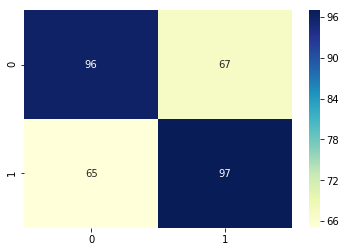

----------------------------------------
svc
Acc: 0.5415384615384615
Precision: 0.9333333333333333
Recall: 0.08641975308641975
F1: 0.15819209039548024


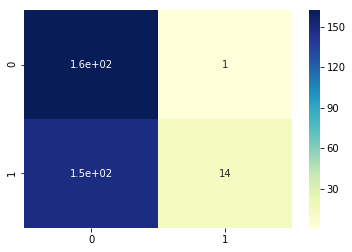

----------------------------------------
dtc
Acc: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


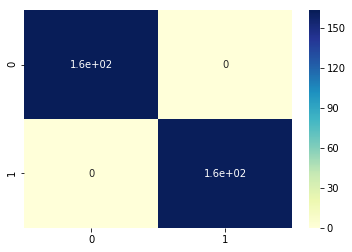

----------------------------------------
rtc
Acc: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


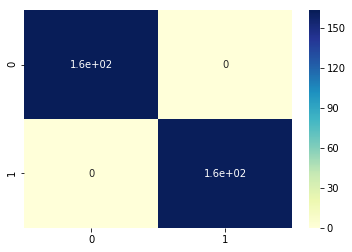

----------------------------------------
gnb
Acc: 0.8892307692307693
Precision: 1.0
Recall: 0.7777777777777778
F1: 0.8750000000000001


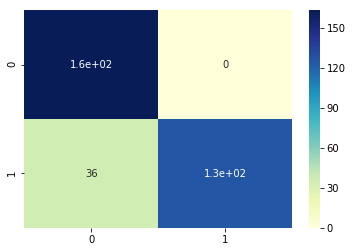

----------------------------------------
nn
Acc: 0.49846153846153846
Precision: 0.49846153846153846
Recall: 1.0
F1: 0.6652977412731006


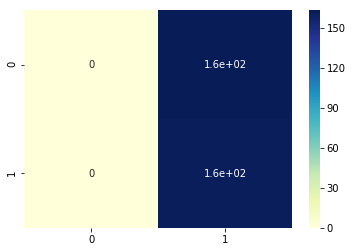

----------------------------------------


In [199]:
from sklearn import metrics
import seaborn as sns

# Recebe os valores reais e os valores preditos e calcula as métricas que estudamos. 
def print_metrics(ytrue, yhat, yhat_prob):
    m1 = metrics.accuracy_score(ytrue, yhat)
    m2 = metrics.precision_score(ytrue, yhat)
    m3 = metrics.recall_score(ytrue, yhat)
    m4 = metrics.f1_score(ytrue, yhat)
    
    print('Acc:', m1)
    print('Precision:', m2 )
    print('Recall:', m3)
    print('F1:', m4)
    
    sns.heatmap(metrics.confusion_matrix(ytrue, yhat, labels=[0,1]),
                annot=True,
                cmap="YlGnBu")
    plt.show()
    
    return [m1,m2,m3,m4]


def train_model(Xtrain, Ytrain, Xtest, model):
    model.fit(Xtrain, Ytrain)
    yhat = model.predict(Xtest)
    yhat_prob = model.predict_proba(Xtest)[:,1]
    return yhat, yhat_prob


metricas = []
probabilidades = []

for classifier, name in classifiers:
    print(name)
    yhat, yhat_prob = train_model(X_train, Y_train, X_test, classifier)
    row = print_metrics(Y_test, yhat, yhat_prob)
    row.append(name)
    metricas.append(row)
    probabilidades.append(yhat_prob)
    print('-'*40)

In [200]:
df_metrics = pd.DataFrame(metricas, columns=['acc',
                                             'precision',
                                             'recall',
                                             'f1',
                                             'classifier'])

df_metrics.set_index('classifier', inplace=True)
df_metrics

,acc,precision,recall,f1
classifier,,,,
knn,0.593846,0.591463,0.598765,0.595092
svc,0.541538,0.933333,0.086420,0.158192
dtc,1.000000,1.000000,1.000000,1.000000
rtc,1.000000,1.000000,1.000000,1.000000
gnb,0.889231,1.000000,0.777778,0.875000
nn,0.498462,0.498462,1.000000,0.665298


# 3) Criar um "modelo" que é a média das probabilidades dos 6 modelos anteriores e gerar as 4 métricas.

In [201]:
n = pd.DataFrame(probabilidades).shape[1]

In [202]:
# O shape do array de probabilidade tem 197 colunas por 6 linhas.
# Ou seja, cada linha é um algoritmo e cada coluna uma observação.
# Vamos inverter isso para ficar mais fácil de ler usando a função reshape do numpy.
probabilidades_transposto = np.reshape(probabilidades,(n,6))

In [203]:
df_probs = pd.DataFrame(probabilidades_transposto, columns=df_metrics.index)
df_probs.head(10)

classifier,knn,svc,dtc,rtc,gnb,nn
0,0.8,0.2,0.8,0.2,0.8,0.4
1,0.6,0.4,0.4,1.0,1.0,0.6
2,1.0,0.8,0.6,0.4,0.6,1.0
3,0.6,0.2,0.2,0.4,0.6,0.4
4,1.0,0.2,0.6,0.0,0.2,0.2
5,0.8,0.8,0.0,0.4,0.0,0.8
6,0.2,0.6,0.8,1.0,0.8,0.2
7,0.4,0.6,1.0,0.6,0.6,0.8
8,0.6,0.2,0.6,0.6,0.2,0.6
9,1.0,0.4,0.6,0.6,0.8,0.6


In [204]:
# Nosso próximo passo será calcular a média das probabilidades
# de cada algoritmo, que será basicamente criar uma nova coluna
# que será a média das primeiras colunas.
# Essa técnica é o inicio da técnica, de usarmos uma combinação
# de varios algoritmos como um único é o método de ensamble que veremos
# com mais detalhes em outra aula.


# Quando usamos o mean no pandas, por default, calculamos as médias das
# colunas (eixo/axis = 0), se quisermos calcular as médias das linhas
# basta trocarmos o eixo de 0->1 (linhas)
df_probs['media_modelos'] = df_probs.mean(axis=1)

In [213]:
df_probs.head(10)

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,1
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667,0,1
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333,0,1
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000,0,0
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,0
5,0.8,0.8,0.0,0.4,0.0,0.8,0.466667,0,0
6,0.2,0.6,0.8,1.0,0.8,0.2,0.600000,0,1
7,0.4,0.6,1.0,0.6,0.6,0.8,0.666667,1,1
8,0.6,0.2,0.6,0.6,0.2,0.6,0.466667,0,0
9,1.0,0.4,0.6,0.6,0.8,0.6,0.666667,0,1


In [206]:
# Vamos acrescentar também o Y verdadeiro:
df_probs['ytrue'] = Y_test.values

In [207]:
# Agora vamos criar uma regra de decisão simples para decidir se o novo
# modelo (média dos modelos) decide como fraude ou não-fraude.

df_probs['yhat_media'] = df_probs['media_modelos']>0.5
df_probs.head()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,True
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667,0,True
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333,0,True
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000,0,False
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,False


In [208]:
# Vamos usar um truque do pandas, eu criei uma nova coluna (yhat_media)
# que recebe uma mascara (que usamos para filtrar dados no pandas)
# A mascara retorna verdadeiro ou falso, mas quando transformamo-a em número.
# obtemos o 0 ou 1 pretendido:

df_probs['yhat_media'] = df_probs['yhat_media'].astype(int)
df_probs.head()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.8,0.2,0.8,0.2,0.8,0.4,0.533333,1,1
1,0.6,0.4,0.4,1.0,1.0,0.6,0.666667,0,1
2,1.0,0.8,0.6,0.4,0.6,1.0,0.733333,0,1
3,0.6,0.2,0.2,0.4,0.6,0.4,0.400000,0,0
4,1.0,0.2,0.6,0.0,0.2,0.2,0.366667,1,0


Acc: 0.49846153846153846
Precision: 0.4965034965034965
Recall: 0.4382716049382716
F1: 0.46557377049180326


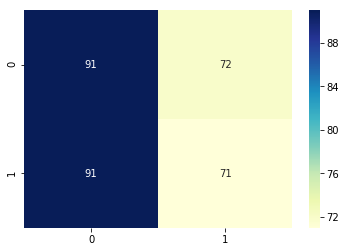

In [209]:
_,_,_,_ = print_metrics(ytrue = df_probs['ytrue'],
                        yhat = df_probs['yhat_media'],
                        yhat_prob = df_probs['media_modelos'])

# 4) Analisando a Curva ROC

In [210]:
df_probs.describe()

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
count,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,325.000000,3.250000e+02,325.000000,325.000000
mean,5.666167e-01,5.595036e-01,5.557731e-01,5.615911e-01,5.499218e-01,0.588481,5.636480e-01,0.498462,0.440000
std,4.172173e-01,4.178235e-01,4.191236e-01,4.171040e-01,4.158329e-01,0.414787,2.326253e-01,0.500769,0.497152
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.850558e-09,0.000000,0.000000
25%,6.395275e-09,1.128083e-07,8.281273e-10,8.036402e-10,2.675095e-07,0.100000,4.609906e-01,0.000000,0.000000
50%,4.804347e-01,4.804347e-01,4.804347e-01,4.804347e-01,4.804347e-01,0.600000,5.000000e-01,0.000000,0.000000
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,6.666667e-01,1.000000,1.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000


In [211]:
df_probs[df_probs.ytrue==1].head(50)

classifier,knn,svc,dtc,rtc,gnb,nn,media_modelos,ytrue,yhat_media
0,0.800000,0.200000,0.800000,0.200000,0.800000,0.400000,0.533333,1,1
4,1.000000,0.200000,0.600000,0.000000,0.200000,0.200000,0.366667,1,0
7,0.400000,0.600000,1.000000,0.600000,0.600000,0.800000,0.666667,1,1
10,0.400000,0.400000,0.600000,0.800000,0.600000,0.800000,0.600000,1,1
12,0.400000,0.800000,0.600000,0.200000,0.600000,1.000000,0.600000,1,1
13,0.800000,0.800000,0.400000,1.000000,0.400000,0.400000,0.633333,1,1
15,0.200000,0.000000,0.200000,0.600000,0.000000,0.400000,0.233333,1,0
16,0.400000,0.000000,0.200000,1.000000,0.800000,0.400000,0.466667,1,0
17,0.000000,0.000000,0.400000,0.200000,0.800000,0.200000,0.266667,1,0
18,0.600000,0.400000,0.000000,0.400000,1.000000,1.000000,0.566667,1,1


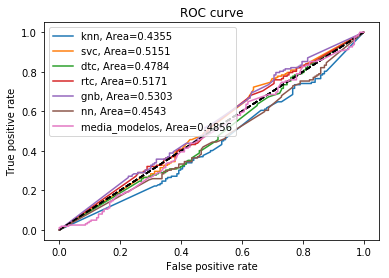

In [212]:
plt.figure()

for model in list(df_probs):
    if 'ytrue' in model or 'yhat_media' in model:
        pass
    else:
        fpr, tpr, _ = metrics.roc_curve(df_probs['ytrue'], df_probs[model])
        auc = metrics.roc_auc_score(df_probs['ytrue'], df_probs[model])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label=model+', Area='+str(np.round(auc,4)))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='best')

plt.show()